In [1]:
import requests
import pandas as pd
import io

url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv"

response = requests.get(url)
wine = pd.read_csv(io.StringIO(response.text))
wine.head()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
wine.shape

(6497, 13)

In [8]:
# checking whether it contains NaN values or not
# Checking for Nan Values
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [11]:
import pandas as pd

# Load the Wine Quality dataset
wine_data = pd.read_csv(url)
# removing the Nan rows
wine_data = wine_data.dropna()

In [19]:
# Checking for duplicated data
wine.duplicated().sum()

np.int64(1168)

In [17]:
# Dropping Duplicates rows
wine_data.drop_duplicates(inplace=True)

np.int64(1168)

In [20]:
from sklearn.model_selection import train_test_split
X = wine_data.iloc[:,1:]
y = wine_data.iloc[:,0]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Calculating accuracy without PCA

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)
y_pred = knn.predict(X_test_scaled)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9933899905571294

In [32]:
X_train_scaled.shape[1] # without using PCA , we had 12 features ( dimensions)

12

# Calculating accuracy with PCA

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

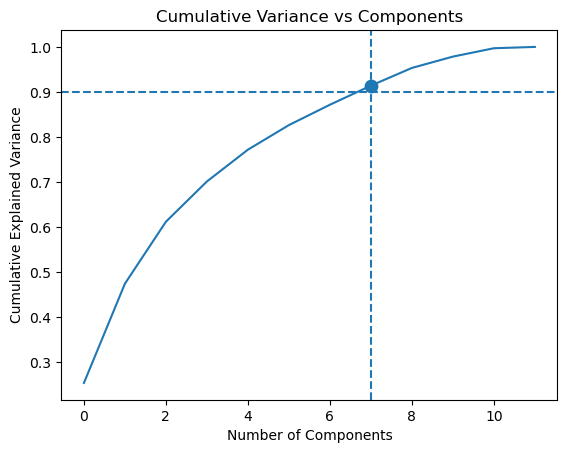

np.int64(7)

In [43]:
import matplotlib.pyplot as plt
import numpy as np

cum = np.cumsum(pca.explained_variance_ratio_)
idx_90 = np.argmax(cum >= 0.90)

plt.plot(cum)
plt.axhline(0.9, linestyle='--')        # horizontal line at 0.9
plt.axvline(idx_90, linestyle='--')     # vertical line at the component index
plt.scatter(idx_90, cum[idx_90], s=80)  # highlight the intersection

plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Variance vs Components")

plt.show()

idx_90

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [45]:
# Train a K-Nearest Neighbors (KNN) classifier with PCA
knn_with_pca = KNeighborsClassifier(n_neighbors=5)
knn_with_pca.fit(X_train_pca, y_train)

# Predict the wine type on the testing set with PCA
y_pred_pca = knn_with_pca.predict(X_test_pca)

# Evaluate the classification accuracy with PCA
accuracy_score(y_test, y_pred_pca)

0.9905571293673276

In [46]:
X_train_pca.shape[1]   # after using PCA , we had 5 features ( dimensions) with same amount of accuracy

7